# **Task 1 - Data Exploration and Preprocessing**


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [5]:
df = pd.read_csv(r'C:\Users\Ashish Mishra\OneDrive\Desktop\Data Science\Dataset.csv')

In [6]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [8]:
missing_values = df.isnull().sum()

In [9]:
df['Cuisines'] = df['Cuisines'].fillna('Unknown')

In [10]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [11]:
duplicate_count = df.duplicated().sum()
if duplicate_count > 0:
    df.drop_duplicates(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [13]:
df['Aggregate rating'].describe()

count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64

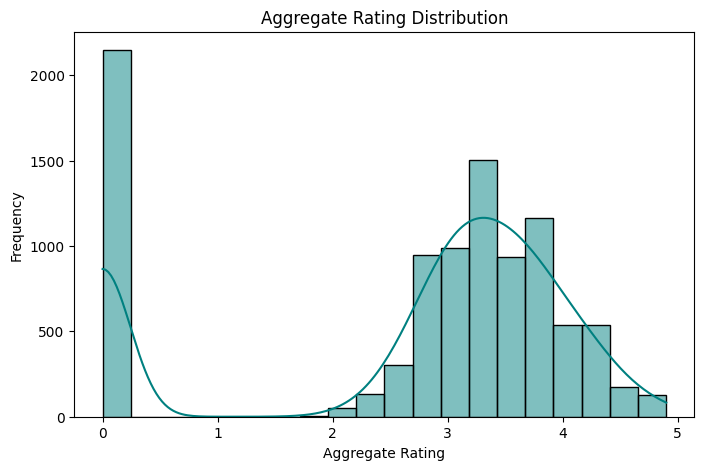

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Aggregate rating'], bins=20, color='teal', kde=True)
plt.title('Aggregate Rating Distribution')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

# **Task 2 - Descriptive Analysis**

In [15]:
summary_stats = df[['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']].describe()
print("\nSummary Statistics:\n", summary_stats)

median_values = df[['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']].median()
std_dev_values = df[['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']].std()

print("\nMedian Values:\n", median_values)
print("\nStandard Deviation Values:\n", std_dev_values)


Summary Statistics:
        Average Cost for two  Price range  Aggregate rating         Votes
count           9551.000000  9551.000000       9551.000000   9551.000000
mean            1199.210763     1.804837          2.666370    156.909748
std            16121.183073     0.905609          1.516378    430.169145
min                0.000000     1.000000          0.000000      0.000000
25%              250.000000     1.000000          2.500000      5.000000
50%              400.000000     2.000000          3.200000     31.000000
75%              700.000000     2.000000          3.700000    131.000000
max           800000.000000     4.000000          4.900000  10934.000000

Median Values:
 Average Cost for two    400.0
Price range               2.0
Aggregate rating          3.2
Votes                    31.0
dtype: float64

Standard Deviation Values:
 Average Cost for two    16121.183073
Price range                 0.905609
Aggregate rating            1.516378
Votes                     430

### By 'Country Code'

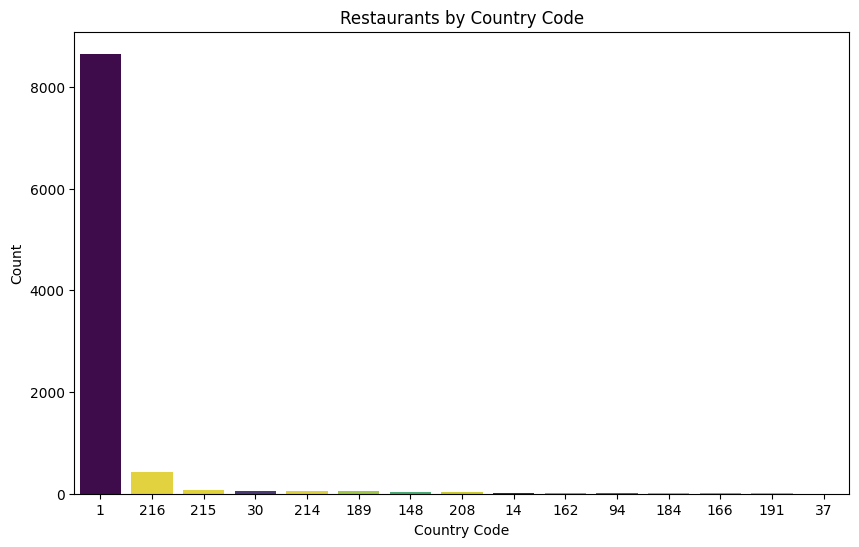

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Country Code', hue='Country Code', dodge=False, order=df['Country Code'].value_counts().index, palette='viridis')
plt.title('Restaurants by Country Code')
plt.xlabel('Country Code')
plt.ylabel('Count')
plt.legend([], [], frameon=False)
plt.show()

### By 'City'


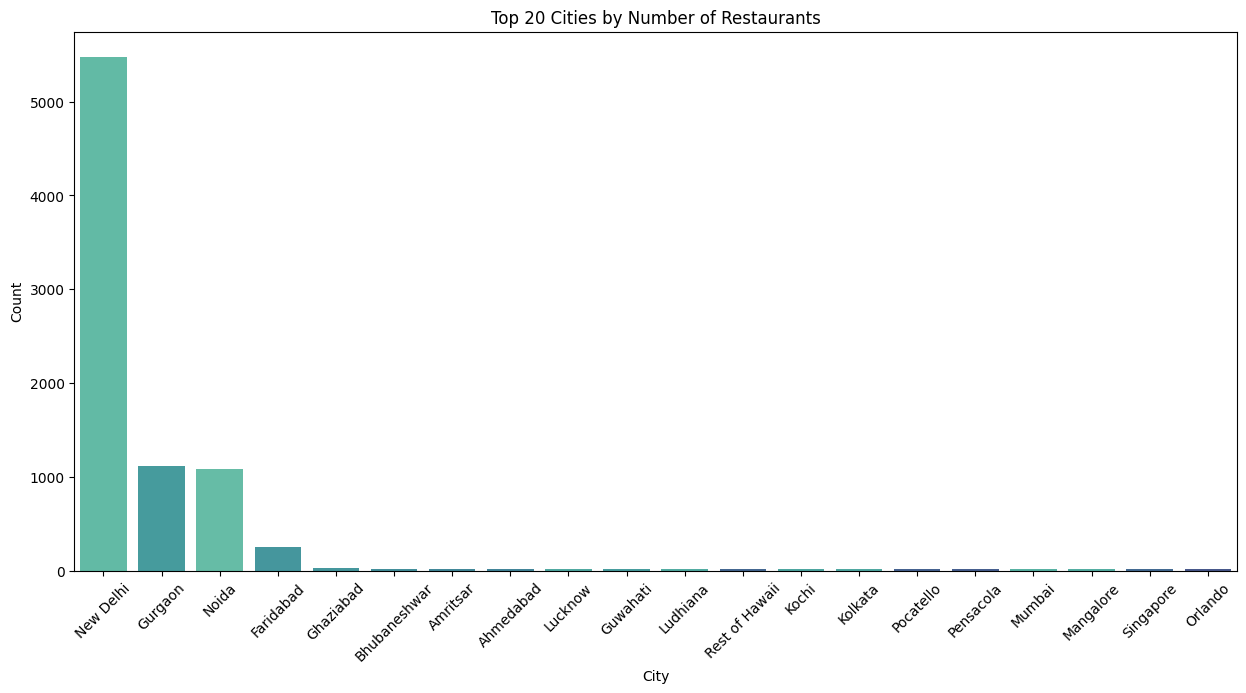

In [17]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='City', hue='City', dodge=False, order=df['City'].value_counts().head(20).index, palette='mako')
plt.legend([], [], frameon=False)
plt.title('Top 20 Cities by Number of Restaurants')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### By 'Cuisines'

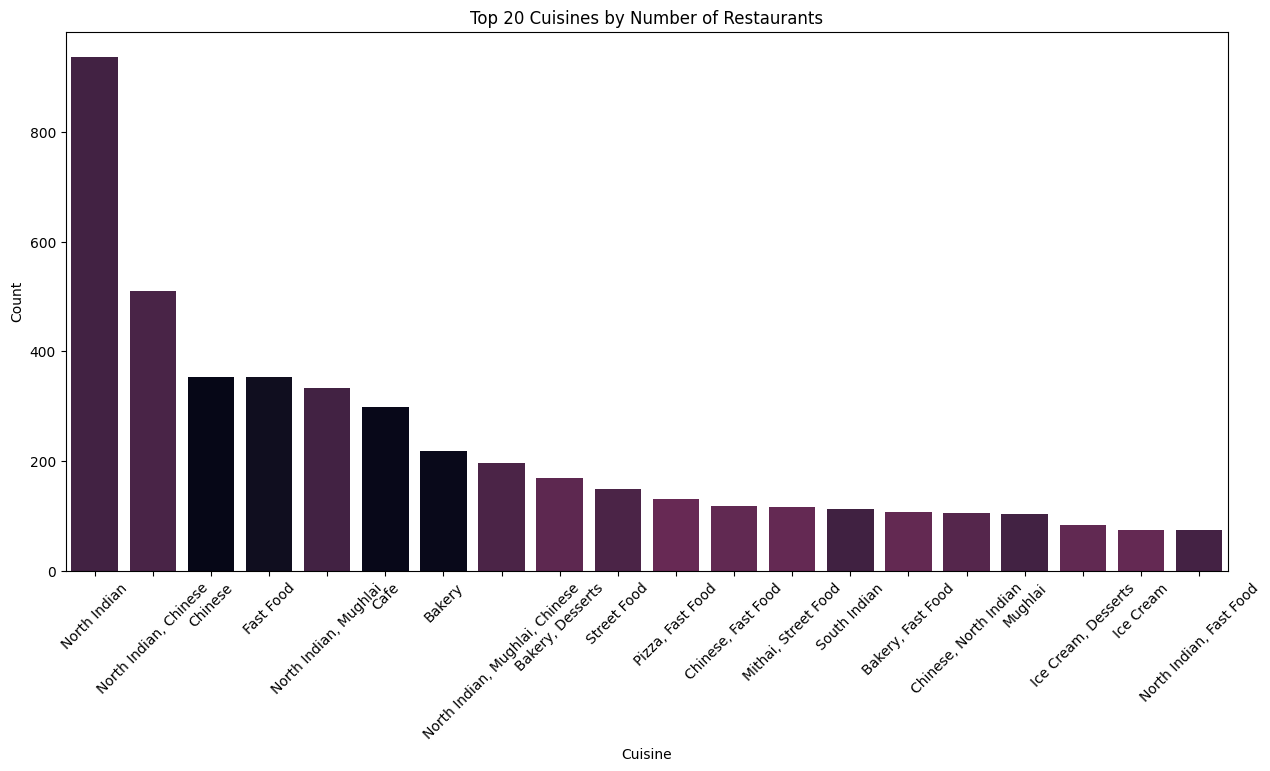

In [18]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='Cuisines', hue='Cuisines', dodge=False, order=df['Cuisines'].value_counts().head(20).index, palette='rocket')
plt.legend([], [], frameon=False)
plt.title('Top 20 Cuisines by Number of Restaurants')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [19]:
top_cuisines = df['Cuisines'].value_counts().head(10)
top_cities = df['City'].value_counts().head(10)

display("Top 10 Cuisines:", top_cuisines)
display("Top 10 Cities:", top_cities)

'Top 10 Cuisines:'

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

'Top 10 Cities:'

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64

# **Task 3 - Geospatial Analysis**

In [20]:
import geopandas as gpd
from shapely.geometry import Point

In [21]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

In [22]:
geo_df.set_crs(epsg=4326, inplace=True)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,geometry
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,POINT (121.02754 14.56544)
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,POINT (121.0141 14.55371)
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,POINT (121.05683 14.5814)
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,POINT (121.05648 14.58532)
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,POINT (121.05751 14.58445)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,POINT (28.97739 41.02279)
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,POINT (29.0413 41.00985)
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,POINT (29.03464 41.05582)
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,POINT (29.03602 41.05798)


In [29]:
file_path = r'C:\Users\Ashish Mishra\Downloads\110m_cultural\ne_110m_admin_0_countries.shp'

<Figure size 1500x1000 with 0 Axes>

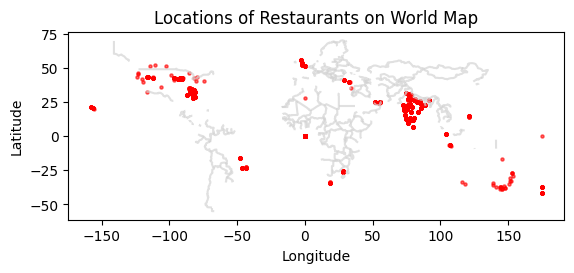

In [30]:
plt.figure(figsize=(15, 10))
world.plot(color='lightgrey', edgecolor='black', alpha=0.7)
geo_df.plot(ax=plt.gca(), color='red', markersize=5, alpha=0.6)
plt.title('Locations of Restaurants on World Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [31]:
restaurant_distribution = df['City'].value_counts()
print("\nDistribution of Restaurants Across Different Cities:\n", restaurant_distribution.head(10))


Distribution of Restaurants Across Different Cities:
 City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64


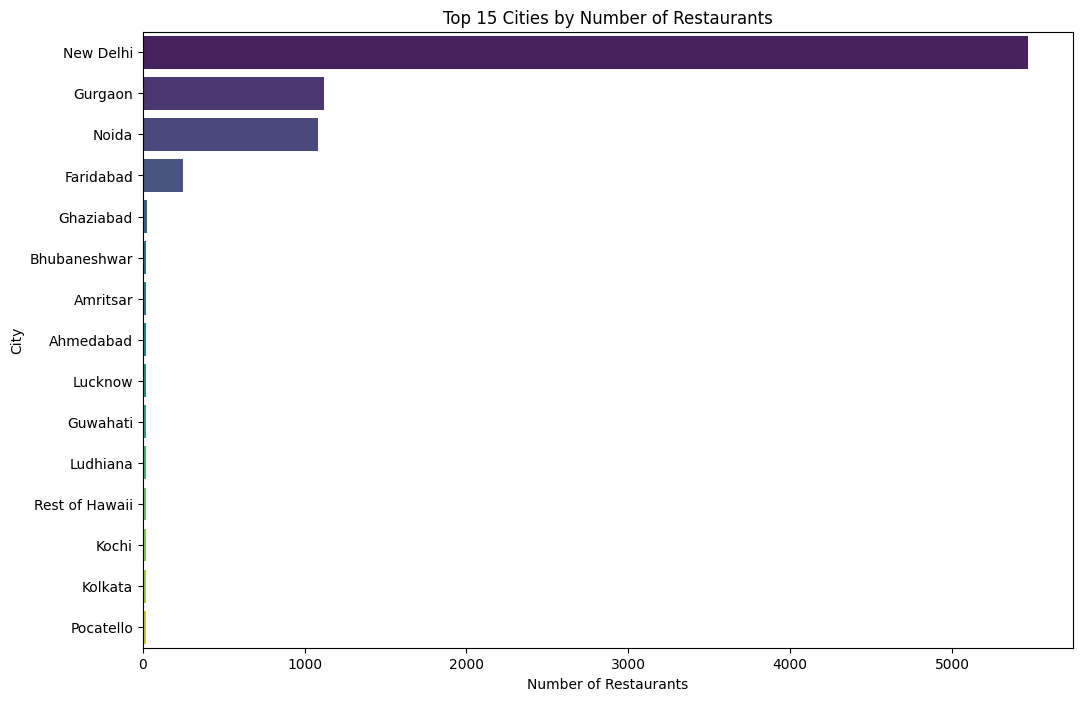

In [33]:
plt.figure(figsize=(12, 8))
sns.barplot(
    y=restaurant_distribution.head(15).index, 
    x=restaurant_distribution.head(15).values, 
    hue=restaurant_distribution.head(15).index, 
    dodge=False, 
    palette='viridis', 
    legend=False
)
plt.title('Top 15 Cities by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()

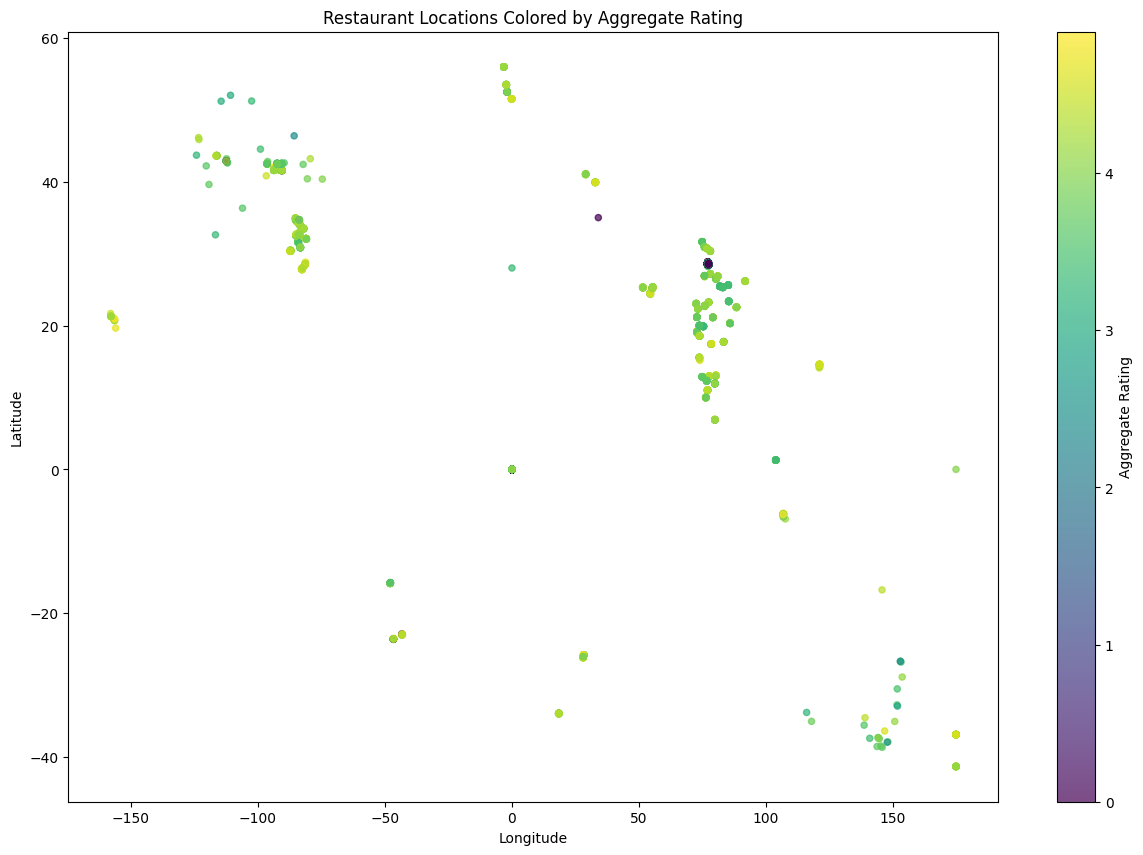

In [35]:
plt.figure(figsize=(15, 10))
sc = plt.scatter(
    df['Longitude'], 
    df['Latitude'], 
    c=df['Aggregate rating'], 
    cmap='viridis', 
    alpha=0.7, 
    s=20  # size of the points
)
plt.colorbar(sc, label='Aggregate Rating')  # Add colorbar for Aggregate Rating
plt.title('Restaurant Locations Colored by Aggregate Rating')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [36]:
average_rating_country = df.groupby('Country Code')['Aggregate rating'].mean()
print("\nAverage Ratings Per Country:\n", average_rating_country.sort_values(ascending=False).head(10))


Average Ratings Per Country:
 Country Code
162    4.468182
208    4.300000
94     4.295238
148    4.262500
214    4.233333
189    4.210000
215    4.087500
166    4.060000
216    4.004378
191    3.870000
Name: Aggregate rating, dtype: float64
